f:\Directory\Python\Git\Example\.conda\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/100, Train Acc: 0.0761, Val Acc: 0.0739
Epoch 2/100, Train Acc: 0.0738, Val Acc: 0.0712
Epoch 3/100, Train Acc: 0.0730, Val Acc: 0.0713
Epoch 4/100, Train Acc: 0.0725, Val Acc: 0.0730
Epoch 5/100, Train Acc: 0.0739, Val Acc: 0.0757
Epoch 6/100, Train Acc: 0.0764, Val Acc: 0.0802
Epoch 7/100, Train Acc: 0.0805, Val Acc: 0.0848
Epoch 8/100, Train Acc: 0.0861, Val Acc: 0.0913
Epoch 9/100, Train Acc: 0.0918, Val Acc: 0.0969
Epoch 10/100, Train Acc: 0.0975, Val Acc: 0.1043
Epoch 11/100, Train Acc: 0.1045, Val Acc: 0.1111
Epoch 12/100, Train Acc: 0.1124, Val Acc: 0.1189
Epoch 13/100, Train Acc: 0.1200, Val Acc: 0.1271
Epoch 14/100, Train Acc: 0.1268, Val Acc: 0.1344
Epoch 15/100, Train Acc: 0.1324, Val Acc: 0.1404
Epoch 16/100, Train Acc: 0.1386, Val Acc: 0.1468
Epoch 17/100, Train Acc: 0.1450, Val Acc: 0.1518
Epoch 18/100, Train Acc: 0.1501, Val Acc: 0.1573
Epoch 19/100, Train Acc: 0.1545, Val Acc: 0.1608
Epoch 20/100, Train Acc: 0.1595, Val Acc: 0.1659
Epoch 21/100, Train Acc: 0.16

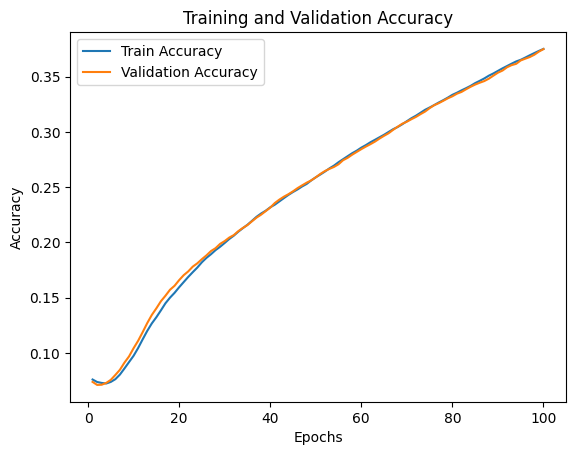

Test Accuracy: 0.3781


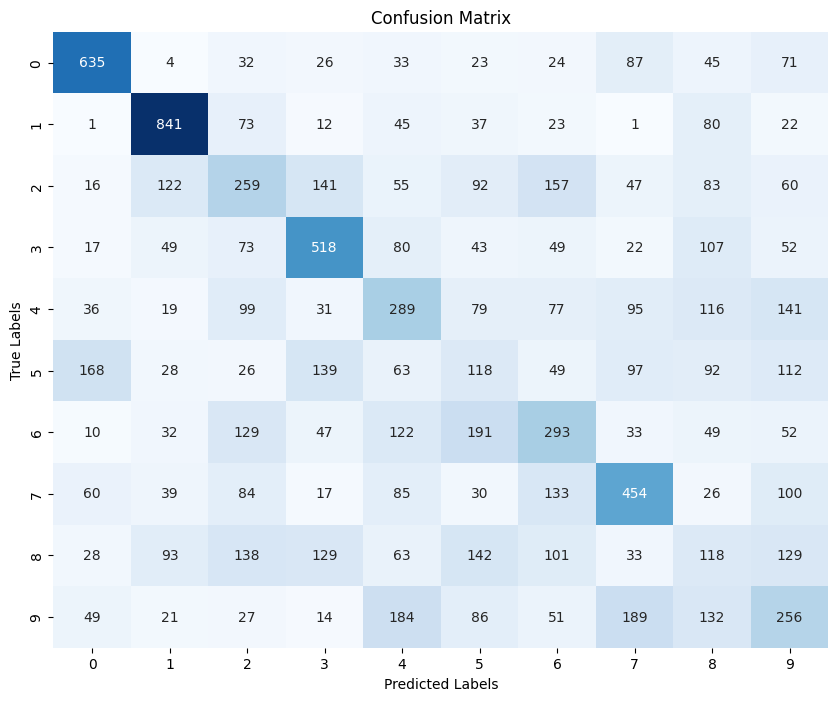

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load MNIST dataset
train_dataset = datasets.MNIST(root='data/', train=True, download=True, transform=None)
test_dataset = datasets.MNIST(root='data/', train=False, download=True, transform=None)

# Extract images and labels
train_imgs = train_dataset.data.numpy()
train_labels = train_dataset.targets.numpy()

test_imgs = test_dataset.data.numpy()
test_labels = test_dataset.targets.numpy()

# Normalize pixel values
train_imgs = train_imgs / 255.0
test_imgs = test_imgs / 255.0

# Flatten images
train_imgs = train_imgs.reshape(train_imgs.shape[0], -1)
test_imgs = test_imgs.reshape(test_imgs.shape[0], -1)

# One-hot encode labels
enc = OneHotEncoder(sparse=False)
train_labels = enc.fit_transform(train_labels.reshape(-1, 1))
test_labels = enc.transform(test_labels.reshape(-1, 1))

# Split training set into train and validation sets
train_imgs, val_imgs, train_labels, val_labels = train_test_split(train_imgs, train_labels, test_size=0.2, random_state=42)

# Define neural network architecture
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))
    
    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.softmax(self.z2)
        return self.a2
    
    def backward(self, X, y, learning_rate):
        m = X.shape[0]
        
        delta2 = self.a2 - y
        dW2 = (1 / m) * np.dot(self.a1.T, delta2)
        db2 = (1 / m) * np.sum(delta2, axis=0, keepdims=True)
        
        delta1 = np.dot(delta2, self.W2.T) * self.sigmoid_derivative(self.a1)
        dW1 = (1 / m) * np.dot(X.T, delta1)
        db1 = (1 / m) * np.sum(delta1, axis=0)
        
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def softmax(self, x):
        exp_scores = np.exp(x)
        return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

# Initialize neural network
input_size = train_imgs.shape[1]
hidden_size = 64
output_size = 10
learning_rate = 0.1
num_epochs = 100

model = NeuralNetwork(input_size, hidden_size, output_size)

# Training loop
train_accs = []
val_accs = []

for epoch in range(num_epochs):
    # Forward pass
    outputs = model.forward(train_imgs)
    
    # Backward pass
    model.backward(train_imgs, train_labels, learning_rate)
    
    # Compute training accuracy
    train_preds = np.argmax(outputs, axis=1)
    train_acc = np.mean(train_preds == np.argmax(train_labels, axis=1))
    train_accs.append(train_acc)
    
    # Compute validation accuracy
    val_outputs = model.forward(val_imgs)
    val_preds = np.argmax(val_outputs, axis=1)
    val_acc = np.mean(val_preds == np.argmax(val_labels, axis=1))
    val_accs.append(val_acc)
    
    print(f"Epoch {epoch+1}/{num_epochs}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")

epochs = range(1, num_epochs+1)
plt.plot(epochs, train_accs, label='Train Accuracy')
plt.plot(epochs, val_accs, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Test the model
test_outputs = model.forward(test_imgs)
test_preds = np.argmax(test_outputs, axis=1)
test_acc = np.mean(test_preds == np.argmax(test_labels, axis=1))
print(f"Test Accuracy: {test_acc:.4f}")

cm = confusion_matrix(np.argmax(test_labels, axis=1), test_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()